# **FOI USADO GOOGLE COLAB**

In [3]:
import keras #Redes Neuronais
keras.__version__

'2.2.5'

In [0]:
from keras import models

from keras import layers


import numpy as np #Arrays e afins
import matplotlib.pyplot as plt #Gráficos

# A base de dados: Força Compressiva do Betão (Concrete Compressive Strength)

**I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).**

Link para dataset:

[Concrete Compressive Strength](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)

---

# O Objetivo

Com este código irei tentar prever a força compressiva do betão consoante diferentes valores dos elementos que  quando misturados constituem o betão.

A base de dados contem 1030 instancias, sendo que 70% destes dados foram para treino, 721, e 30% para o teste, 309. 

A escala dos valores de entrada , cada coluna, também varia, numas temos dados de 0 a 10, noutras de 0 a 1000.


# Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description


Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable



In [0]:
#Carregar a Dataset

dataset = np.loadtxt('/content/cdatanoheader.csv', dtype=float, delimiter=',') #Para que este comando funcione tem que se fazer upload do ficheiro novamente e mudar o caminho se necessário;LIMITAÇÃO DO GOOGLE COLAB

In [6]:
#Teste para verificar se foi bem carregada
dataset

array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

In [7]:
#Verificar o tamanho da dataset, terá que dizer 1030 linhas e 9 colunas

dataset.shape

(1030, 9)

# Processamento dos Dados

**Agora iremos preparar os nossos dados para serem utilizados**

**Começamos por dividir as variaveis de input da de output**

Para isso criamos dois novos vetores, um onde iremos retirar a ultima coluna dos dados originais ( esta ultima é a que contem os dados target (output)) e outra onde retiramos tudo até à ultima coluna (para ficarmos com dados de output num só vetor)

**Obtemos assim dois novos vetores**

dataset_input - que deverá ter 1030 linhas e 8 colunas

dataset_target - que deverá ter 1030 linhas e 1 coluna

In [0]:
#Valores de entrada

dataset_inputx=dataset
dataset_inputx=np.delete(dataset_inputx,8,1) #retira a nona coluna

#Dados Alvo
dataset_target=dataset

x=0

while x < 8:
  dataset_target=np.delete(dataset_target,0,1) #obter somente ultima coluna
  x += 1

In [9]:
#teste tamanho vetor input

dataset_inputx.shape

(1030, 8)

In [10]:
#teste tamanho vetor target

dataset_target.shape

(1030, 1)

# Divisão dos Dados para Treino e para Teste

**Tal como referido anteriormente os dados seriam divididos em 70% para treino e 30% para teste algo que é feito com as seguintes linhas de código:**

In [0]:
dataset_train = dataset_inputx[:721] # 70% dos dados para treino
dataset_test = dataset_inputx[721:] # 30% para teste

In [0]:
dataset_traintarget = dataset_target[:721] #70% dos dados para treino - target
dataset_testtarget = dataset_target[721:]# 70% dos dados para teste - target

**Como os nossos dados(entre cada variavel de entrada) variam muito:**

Ex:

1.   1º Variavel de Entrada são de 0-10
2.   2º Variavel de Entrada são de 0-1000
3.   ....

**E embora a rede neuronal possa conseguir adaptar-se automaticamente a estes dados heterogeneos a aprendizagem demoraria muito mais. Por isso procederemos a normalização dos dados que é uma pratica bem aceite neste caso.**



In [0]:
#Normalização dos Dados

mean = dataset_train.mean(axis=0)
dataset_train -= mean
std = dataset_train.std(axis=0)
dataset_train /= std

dataset_test -= mean
dataset_test /= std

# Construir a nossa rede

Iremos usar a rede do exemplo 3.7 do Deep Learning with python, esta rede tem 2 camadas ocultas, cada com 64 unidades.

Em geral quanto menos dados de treino tivermos, pior será o overfitting e neste caso usar uma rede pequena é uma maneira de mitigar o overfitting.

Usaremos aqui a função Rectified Linear Unit (Relu) que é a seguinte:

![alt text](https://qph.fs.quoracdn.net/main-qimg-d23ac99265ab19599e71c9d1a3cb089a)


Esta função é desde 2017, a mais popular na ativação das chamadas *Deep Neural Networks* pois o treino é facil e atinge-se melhor performance.

Nesta função a sua derivada acima do 0 é sempre 1.

Esta função quando são dados valores positivos o seu output é direto, quando são dados valores negativos esta devolve 0.



---

Iremos também monotorizar o parametro mae - Erro Médio Absoluto, ou seja, o valor absoluto médio entre os valores previstos e os target. Por ex um erro médio de 5 diria que estamos afastados 5 MPa (Megapascal) dos valores target.

In [0]:
#Construção do modelo da rede

def build_model():
    # Como teremos que instanciar
    # o mesmo modelo várias vezes,
    # usamos uma função para o construir.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(dataset_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Validar a nossa abordagem utilizando K-fold

Podiamos simplesmente dividir os dados entre um training set e um test set e não utilizar K-fold. Mas devido aos poucos dados acabariamos com um validation set muito pequeno. Dai o uso do K-Fold, este separa os dados disponiveis em varias partições K( normalmente K=4, ou K=5) , instancializa modelos K identicos e treina cada K-1 enquanto avalia nas restantes partições K. O *validation score* será então a média dos *validations scores* obtidos em cada partição K.

In [15]:
k = 4
num_val_samples = len(dataset_train) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparar os dados de validação: data da partição # k
    val_data = dataset_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = dataset_traintarget[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparar os dados de treino: dados de todas as outras partições
    partial_dataset_train = np.concatenate(
        [dataset_train[:i * num_val_samples],
         dataset_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_dataset_traintarget = np.concatenate(
        [dataset_traintarget[:i * num_val_samples],
         dataset_traintarget[(i + 1) * num_val_samples:]],
        axis=0)

    # Construir o modelo keras (já compilado)
    model = build_model()
    # Treinar o modelo (de forma silenciosa, verbose=0)
    model.fit(partial_dataset_train, partial_dataset_traintarget,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Avaliar o modelo nos dados de validação
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0












processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
all_scores

[9.861933347913954, 5.945225800408258, 7.117808447943793, 7.820740932888455]

In [17]:
np.mean(all_scores)

7.686427132288615

Podemos verificar que as diferentes execuções *folds* nos dão diferentes valores entre 5.9 a 9.8 portanto usar a média destes valores 7.7 é melhor para a metrica que usar quaisquer um deles. Este 7.7 significa então que estamos a 7.7 MPa em média dos valores a obter.

In [18]:
from keras import backend as K

# Limpar a memória
K.clear_session()

In [19]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparar os dados de validação: data da partição # k
    val_data = dataset_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = dataset_traintarget[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparar os dados de treino: dados de todas as outras partições
    partial_dataset_train = np.concatenate(
        [dataset_train[:i * num_val_samples],
         dataset_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_dataset_traintarget = np.concatenate(
        [dataset_traintarget[:i * num_val_samples],
         dataset_traintarget[(i + 1) * num_val_samples:]],
        axis=0)

    # Construir o modelo keras (já compilado)
    model = build_model()
    # Treinar o modelo (de forma silenciosa, verbose=0)
    history = model.fit(partial_dataset_train, partial_dataset_traintarget,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

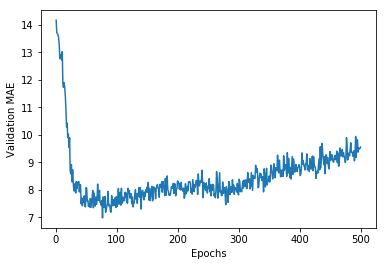

In [21]:
#fazer gráficos para verificar onde se tem menos perdas

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

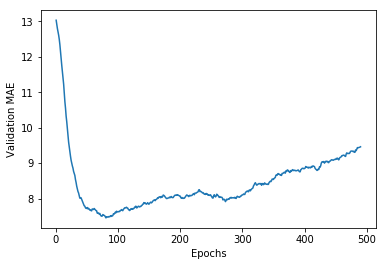

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Nota-se que não há melhorias depois dos 70-80 epochs logo começamos a ter overfitting.

In [23]:
# Novo, modelo compilado.
model = build_model()
# Treinar o mesmo em todos os dados.
model.fit(dataset_train, dataset_traintarget,
          epochs=70, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(dataset_test, dataset_testtarget)

309/309 [==============================] - 0s 339us/step


In [24]:
test_mae_score

8.808756979538014

Isto signfica que ficamos acerca 8.8 MPa dos valores target